In [7]:
import numpy as np
import pandas as pd
import seaborn as sns

### Loading Dataset

In [23]:
df = pd.read_csv("emotion_dataset_raw.csv")

In [33]:
df.Emotion.value_counts()

Emotion
joy         11045
sadness      6722
fear         5410
anger        4297
surprise     4062
neutral      2254
disgust       856
shame         146
Name: count, dtype: int64

<Axes: xlabel='Emotion', ylabel='count'>

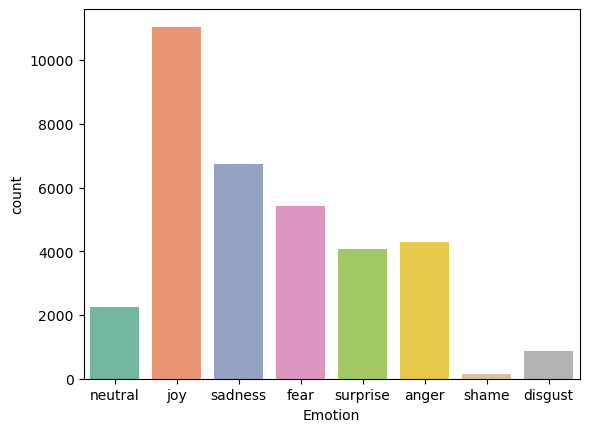

In [45]:
sns.countplot(x="Emotion",hue="Emotion",data=df,palette='Set2')

### Data Preprocessing

In [53]:
import neattext.functions as nfx

df["Clean_Text"] = df["Text"].apply(nfx.remove_userhandles)

In [55]:
df['Clean_Text'] = df['Clean_Text'].apply(nfx.remove_stopwords)

In [59]:
df

,Emotion,Text,Clean_Text
0,neutral,Why ?,?
1,joy,Sage Act upgrade on my to do list for tommorow.,Sage Act upgrade list tommorow.
2,sadness,ON THE WAY TO MY HOMEGIRL BABY FUNERAL!!! MAN ...,WAY HOMEGIRL BABY FUNERAL!!! MAN HATE FUNERALS...
3,joy,Such an eye ! The true hazel eye-and so brill...,eye ! true hazel eye-and brilliant ! Regular f...
4,joy,@Iluvmiasantos ugh babe.. hugggzzz for u .! b...,ugh babe.. hugggzzz u .! babe naamazed nga ako...
...,...,...,...
34787,surprise,@MichelGW have you gift! Hope you like it! It'...,gift! Hope like it! hand wear ! It'll warm! Lol
34788,joy,The world didnt give it to me..so the world MO...,world didnt me..so world DEFINITELY cnt away!!!
34789,anger,A man robbed me today .,man robbed today .
34790,fear,"Youu call it JEALOUSY, I call it of #Losing YO...","Youu JEALOUSY, #Losing YOU..."


### Splitting into training and testing

In [62]:
from sklearn.model_selection import train_test_split

x_train,x_test,y_train,y_test = train_test_split(df['Clean_Text'],df['Emotion'],test_size=0.3,random_state=42)

### Train the Model

In [65]:
from sklearn.pipeline import Pipeline
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression

In [79]:
pipe_lr = Pipeline(steps=[('cv',CountVectorizer()),('lr',LogisticRegression(max_iter=1000))])
pipe_lr.fit(x_train,y_train)
pipe_lr.score(x_test,y_test)

0.6209043878137575

In [81]:
pipe_svm = Pipeline(steps=[('cv',CountVectorizer()),('svc', SVC(kernel = 'rbf', C = 10))])
pipe_svm.fit(x_train,y_train)
pipe_svm.score(x_test,y_test)

0.62195822954589

In [104]:
pipe_rf = Pipeline(steps=[('cv',CountVectorizer()),('rf',RandomForestClassifier(n_estimators=60))])
pipe_rf.fit(x_train,y_train)
pipe_rf.score(x_test,y_test)

0.5848821613335888

### Saving the model

In [123]:
import joblib 

pipeline_file = open("text_emotion.pkl",'wb')
joblib.dump(pipe_lr,pipeline_file)
pipeline_file.close()

In [125]:
pipe_lr.classes_

array(['anger', 'disgust', 'fear', 'joy', 'neutral', 'sadness', 'shame',
       'surprise'], dtype=object)